In [46]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="funnel",
    dataset_number_of_points=10**5,
    dataloader_parameters=dict(batch_size=64, shuffle=True),
    pushforward_operator_name="sun_quantile_network",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=1,
        hidden_dimension=8,
        number_of_hidden_layers=2,
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=10,
        verbose=True,
        optimizer_parameters=dict(lr=0.1),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.eval()

Training:   0%|          | 0/10 [00:00<?, ?it/s]

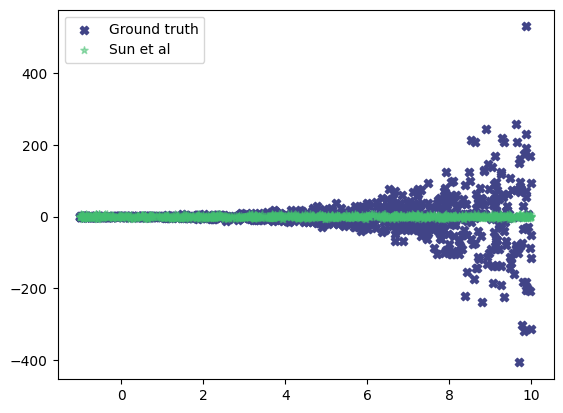

In [47]:
import matplotlib.pyplot as plt
import matplotlib
import torch
from datasets import FunnelDistribution

tensor_parameters = dict(dtype=torch.float64, device=torch.device("cpu"))
dataset = FunnelDistribution(tensor_parameters=tensor_parameters)

number_of_points = 10**3
U = torch.randn(number_of_points, 1).to(**tensor_parameters)
# X = dataset.sample_covariates(number_of_points).to(**tensor_parameters)
X = (torch.rand(number_of_points, 1)*(11) - 1).to(**tensor_parameters)
model.to(X)
_, Y_gt = dataset.sample_conditional(X)
Y = model.push_u_given_x(U, X)
size = 30.

color_map = matplotlib.colormaps['viridis']

plt.scatter(X[:, 0], Y_gt[:, 0], color=color_map(0.2), label="Ground truth", marker="X")
plt.scatter(X[:, 0], Y[:, 0], s=size, color=color_map(0.7), marker="*", label="Sun et al", alpha=0.5)
plt.legend()
plt.show()